# Exploring the Simulated Data
This notebook imports the simulated data and plots HI intensity maps using plt.imshow(). This is done to illustrate what the cosmological HI signal and foregrounds look like. The plots produced effectively illustrate why foreground removal is so crucial when using HI intensity mapping as a cosmological probe. <br/>
This notebook then plots the covariance matrices of Hi signal and foreground to show the differences in the way these components behave, i.e. foreground varies smoothly with frequecny while the cosmological HI signal does not. <br/>
Finally, this notebook includes smoothing of the data to mimic the effects of limited telescope resolution on real data. <br/>

## Plotting HI Intensity Maps


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import PCA

import matplotlib.colors as mcolors

In [2]:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

In [3]:
### LOAD IN THE DATA ###
T_HI = np.load('MultiDarkSims/dT_HI.npy')    #HI intensity map
T_FG = np.load('MultiDarkSims/dT_FG.npy')     #foreground map
nx,ny,nz = np.shape(T_HI)

The data used here comes from https://github.com/IntensityTools/MultipoleExpansion and corresponds is centred on a redshift of z=0.82. <br/>
more info about the data, as well: frequency range, mention the shape and the physical dimensions of the image and the units of intenisties/temperatures 

In [4]:
### GET FREQUENCY RANGE OF DATA FOR PLOTTING ###
zz = np.linspace(0.8,0.84,nz) 

v = 1420/(1+zz)#frequency range

extent=[np.min(v),np.max(v),np.min(v),np.max(v)]

In [5]:
T_ALL = T_HI + T_FG #combine signal and foreground

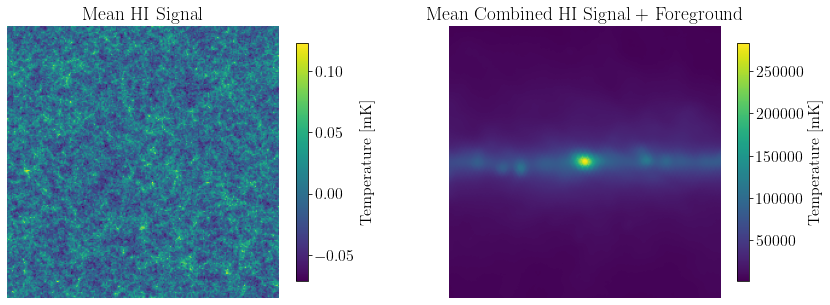

In [6]:
#### PLOT THE INTESTY MAPS FOR COSMLOGIAL HI SIGNAL AND FOREGROUNDS ####

fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)

#plot cosmological HI 
plt.subplot(121)
plt.imshow(np.mean(T_HI,2))
plt.title("Mean HI Signal")
plt.colorbar(label = "Temperature [mK]", shrink = 0.73)
plt.axis('off')

#plot signal plus foreground
plt.subplot(122)
plt.imshow(np.mean(T_ALL,2))
plt.title("Mean Combined HI Signal + Foreground")
plt.colorbar(label="Temperature [mK]", shrink = 0.73)
plt.axis('off');

#plt.savefig("plots/HI-intensity-maps.png")

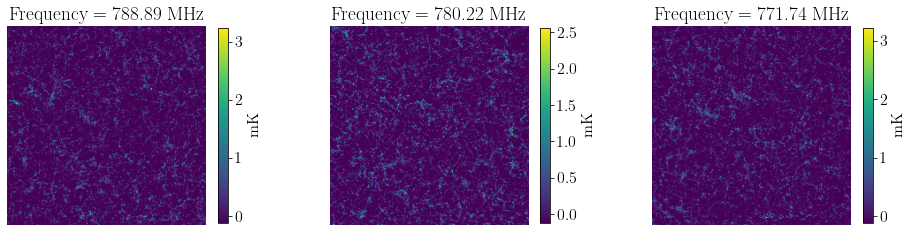

In [7]:
### PLOT HI SIGNAL FOR VARIOUS FREQUENCIES ###

fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(wspace=0.3)

#Nz = 0 
plt.subplot(131)
plt.imshow(T_HI[:,:,0])
plt.title(f"Frequency = {np.round(v[0],2)} MHz")
plt.axis('off')
plt.colorbar(label = "mK", shrink = 0.45)

#Nz = 113
plt.subplot(132)
plt.imshow(T_HI[:,:,112])
plt.title(f"Frequency = {np.round(v[112],2)} MHz")
plt.axis('off')
plt.colorbar(label="mK", shrink = 0.45)

#Nz = 224
plt.subplot(133)
plt.imshow(T_HI[:,:,224])
plt.title(f"Frequency = {np.round(v[224],2)} MHz")
plt.axis('off')
plt.colorbar(label = "mK", shrink = 0.45);

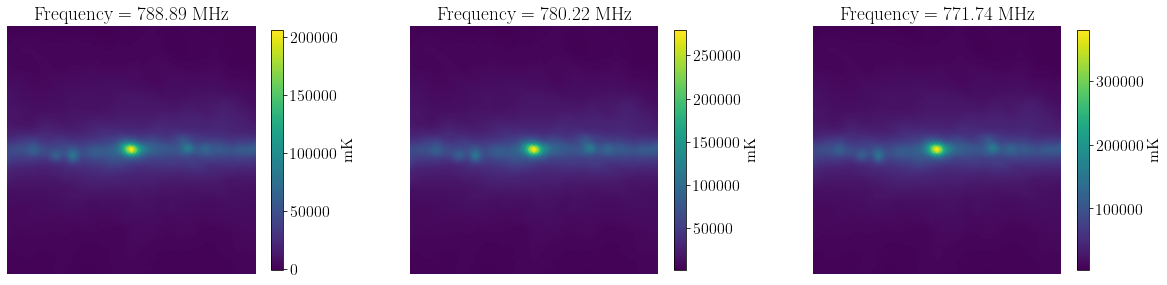

In [8]:
### PLOT TOTAL SIGNAL FOR VARIOUS FREQUENCIES ###

fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(wspace=0.3)

#Nz = 0 
plt.subplot(131)
plt.imshow(T_ALL[:,:,0])
plt.title(f"Frequency = {np.round(v[0],2)} MHz")
plt.axis('off')
plt.colorbar(label = "mK", shrink = 0.55)

#Nz = 112
plt.subplot(132)
plt.imshow(T_ALL[:,:,112])
plt.title(f"Frequency = {np.round(v[112],2)} MHz")
plt.axis('off')
plt.colorbar(label="mK", shrink = 0.55)

#Nz = 224
plt.subplot(133)
plt.imshow(T_ALL[:,:,224])
plt.title(f"Frequency = {np.round(v[224],2)} MHz")
plt.axis('off')
plt.colorbar(label = "mK", shrink = 0.55);

### Smoothly Varying Foregrounds
The following blocks compare the variation of the foregrounds with the cosmological HI signal. This is done firstly by plotting the mean temperature against frequency and then by plotting the covariance matrices of these components. <br/> 

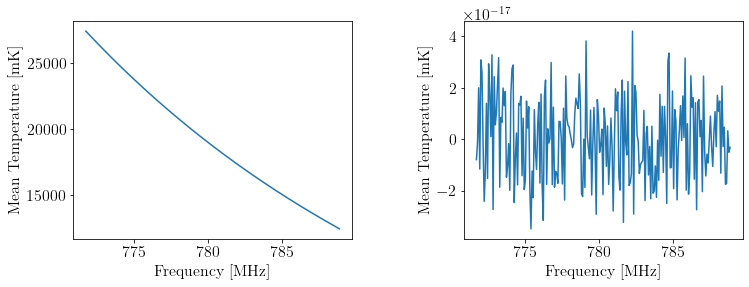

In [9]:
### PLOT OF VARIATION OF FOREGROUND AND SIGNAL WITH FREQUENCY###
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.4)

fg_mean = np.zeros(nz)
for i in range(nz):         #find mean intensity of foreground for each map 
    r_mean = np.mean(T_FG[:,:,i])
    fg_mean[i] = r_mean

plt.subplot(121)
plt.plot(v,fg_mean)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Mean Temperature [mK]")

HI_mean = np.zeros(nz)
for i in range(nz):         #find mean intensity of foreground for each map 
    r_mean = np.mean(T_HI[:,:,i])
    HI_mean[i] = r_mean

plt.subplot(122)
plt.plot(v,HI_mean)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Mean Temperature [mK]");
#plt.savefig('plots/sims-variations-with-freq.png')

### Covariance Matrices 

In [12]:
### CALCULATE THE COVARIANCE MATRICES
dT_HI = PCA.mean_centre(T_HI) #first mean centre the data and reshape to: [Nz,Npixels]
dT_FG = PCA.mean_centre(T_FG)

FG_cov = np.cov(dT_FG)   #calculate the normalise covariance matrixes
FG_cov /= np.linalg.norm(FG_cov) 

HI_cov = np.cov(dT_HI)
HI_cov /= np.linalg.norm(HI_cov) 

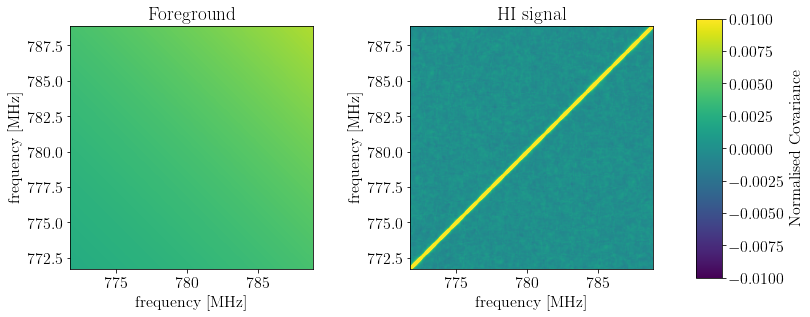

In [24]:
### PLOT COVARIANCE MATRICES###
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.4)
norm = mcolors.TwoSlopeNorm(vmin = -0.01,vmax = 0.01,vcenter=0)

#plot foreground covariance matrix
plt.subplot(121)
im = plt.imshow(FG_cov, origin = 'lower', extent=extent,norm=norm)
plt.title("Foreground")
plt.xlabel('frequency [MHz]')
plt.ylabel('frequency [MHz]')

#plot HI covariance matrix
plt.subplot(122)
plt.imshow(HI_cov, origin = 'lower',extent=extent,norm=norm)
plt.title("HI signal")
plt.xlabel('frequency [MHz]')
plt.ylabel('frequency [MHz]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
fig.colorbar(im,label="Normalised Covariance",cax=cbar_ax);
#fig.savefig('plots/covariance.png')

## Smoothing with Gaussian Beam convolution
Now, a gaussian beam convolution is applied to the intensity maps to replicate the effects of limited resolution of telescopes in real data. <br/> 
This was done using the smoothimage() function which was adapted from: https://github.com/IntensityTools/MultipoleExpansion/blob/master/teletools.py <br/> 
In this case the smoothing was applied to the data using a beam size of 1 degree.

In [25]:
from smoothing import smoothimage

n = 0 #value of nz to smooth
lx, ly, lz = 29, 29, 29 
sig = 1  #beam size in degrees

image = T_ALL[:,:,n]  #images to smooth
HI_image =T_HI[:,:,n]

In [26]:
#smoothing applied to the images
smoothed_image = smoothimage(image,lx,ly,nx,ny,sig)
HI_smoothed_image = smoothimage(HI_image,lx,ly,nx,ny,sig)

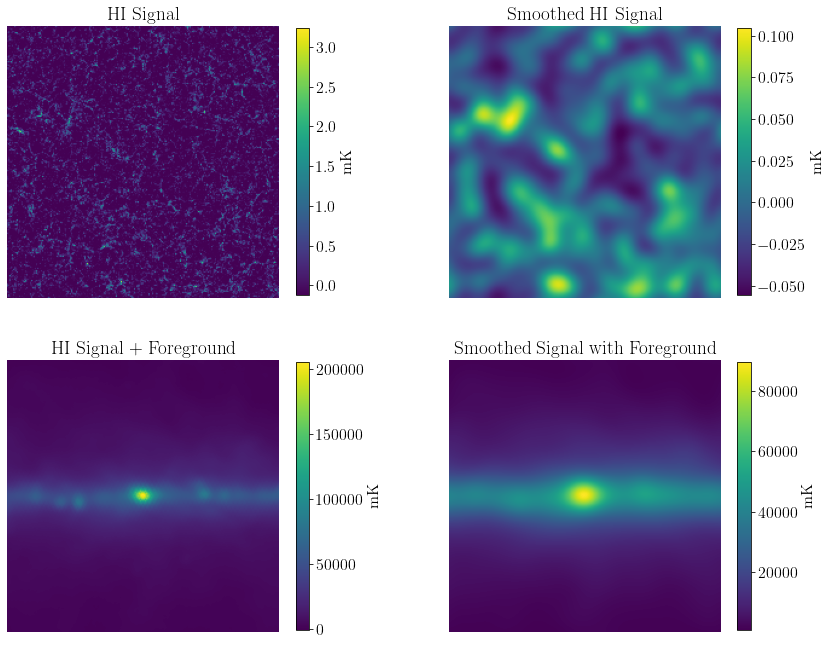

In [27]:
### PLOT SMOOTHED MAPS ### SWAP SO IT MAKES SENSE LOL
fig = plt.figure(figsize=(14,12))
fig.subplots_adjust(wspace=0.3,hspace=0.05)

#plot cosmological HI 
plt.subplot(221)
plt.imshow(HI_image)
plt.title("HI Signal")#HI Signal+ Foreground before smoothing")
plt.axis('off')
plt.colorbar(label = "mK", shrink = 0.84)

#plot signal plus foreground
plt.subplot(222)
plt.imshow(HI_smoothed_image)
plt.title("Smoothed HI Signal")#HI Signal+ Foreground after smoothing")
plt.axis('off')
plt.colorbar(label="mK", shrink = 0.84)    

#plot cosmological HI 
plt.subplot(223)
plt.imshow(image)
plt.title("HI Signal + Foreground")#HI Signal+ Foreground before smoothing")
plt.axis('off')
plt.colorbar(label = "mK", shrink = 0.84)

#plot signal plus foreground
plt.subplot(224)
plt.imshow(smoothed_image)
plt.axis('off')
plt.title("Smoothed Signal with Foreground")#HI Signal+ Foreground after smoothing")
plt.colorbar(label="mK", shrink = 0.84);

#plt.savefig('plots/combo-beam-conv.png')

In [28]:
### APPLY SMOOTHING OVER DATA CUBE AND FIND COVARIANCE ###
smoothed = []               #cube of smoothed images of shape: [nz,nx,ny]
HI_smoothed = []
for i in range(nz):
    image = T_ALL[:,:,i]
    HI_image = T_HI[:,:,i]
    
    smoothed_image = smoothimage(image,lx,ly,nx,ny,sig)
    smoothed.append(smoothed_image)
    
    HI_smoothed_image = smoothimage(HI_image,lx,ly,nx,ny,sig)
    HI_smoothed.append(HI_smoothed_image)  
    
smoothed = np.array(smoothed)
HI_smoothed = np.array(HI_smoothed)

np.save('Data/smoothed',smoothed)
np.save('Data/HI-smoothed',HI_smoothed)

In [29]:
### RESHAPE AND MEAN CENTRE DATA ###
dsmoothed = PCA.shaping(smoothed,xyz=False) #reshape to the form nx,ny,nz for mean centring
dsmoothed = PCA.mean_centre(dsmoothed)

dHI_smoothed = PCA.shaping(HI_smoothed,xyz=False)
dHI_smoothed = PCA.mean_centre(dHI_smoothed)

In [30]:
### CALCULATE COVARIANCE MATRIX ###
cov = np.cov(dsmoothed)
cov /= np.linalg.norm(cov) 

HI_cov = np.cov(dHI_smoothed)
HI_cov /= np.linalg.norm(HI_cov) 

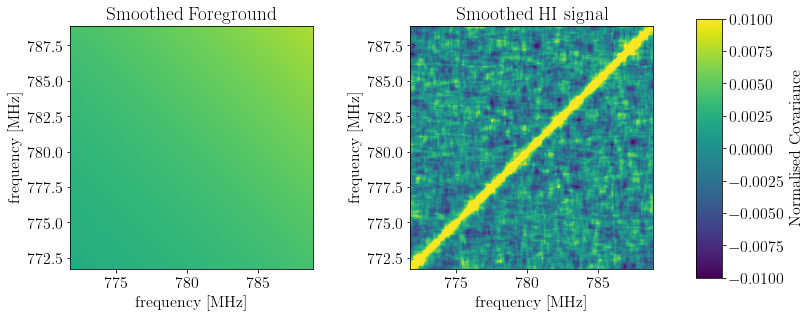

In [33]:
### PLOT TRUE AND ESTIMATED FOREGROUNDS ###
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.4)
norm = mcolors.TwoSlopeNorm(vmin = -0.01,vmax = 0.01,vcenter=0)

#plot HI intensity map 
plt.subplot(121)
plt.imshow(cov, origin = 'lower', extent=extent,norm=norm)
plt.title("Smoothed Foreground")
plt.xlabel('frequency [MHz]')
plt.ylabel('frequency [MHz]')
#plt.colorbar(label="Normalised Covariance", shrink = 0.73)

#plot HI intenisty map with foreground
plt.subplot(122)
im = plt.imshow(HI_cov, origin = 'lower',extent=extent,norm=norm)
plt.title("Smoothed HI signal")
plt.xlabel('frequency [MHz]')
plt.ylabel('frequency [MHz]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
fig.colorbar(im,label="Normalised Covariance",cax=cbar_ax);
#fig.savefig('plots/smoothed-covariance.png')